## Code Discussion 4
#### Zixun Hao zh210
In the `Data/` folder, there are five separate news reports on Turkish President Erdogan addressing the murder of journalist Jamal Khashoggi in `.txt` files. Each contains the same story (relatively speaking) from different sources with different political leanings/interests. In addition to this, I also include `stop-words.csv` file containing common English words that we want to purge from our text.

Use what we know about (a) reading in text files, (b) data manipulation, and (c) linear algebra to analyze the difference between these documents. Does each news site report on these stories in a similar way? Which news sites talk about the Khashoggi scandal in similar/dissimilar ways? If you change what words you remove, does the picture of similarity change?

In [1]:
# import packages 
import pandas as pd
import numpy as np

### Load articles and the list of stop words

In [174]:
# load stop_words.csv and news articles (use ../Data/ as the articles are not in the current working directory)
stop_words = pd.read_csv('../Data/stop_words.csv')
aljazeera = open('../Data/aljazeera-khashoggi.txt','r').read()
bbc = open('../Data/bbc-khashoggi.txt','r').read()
breitbart = open('../Data/breitbart-khashoggi.txt','r').read()
cnn = open('../Data/cnn-khashoggi.txt','r').read()
fox = open('../Data/fox-khashoggi.txt','r').read()

# see how many rows(words) are in stop_words dataframe
stop_words.shape

(728, 1)

In [175]:
# convert stop_words to a list
stopWords = stop_words['word'].tolist()

### Clean the texts

In [170]:
# define a function to remove the suffix of a word
def remove_suffix(word):
    """
    This function takes in a word (string) as input and returns a word (string) without suffix as output.

    Parameters: 
        Args (str): a word 
  
        Returns (str): the word after removing its suffix
    """
    suffixes = "es", "er", "s", "ed", "ly", "ing"
    # remove the suffix from the word (if it has suffix)
    for suffix in suffixes:
            if word[-len(suffix):] == suffix:
                word = word[:-len(suffix)]
                break
    return word

In [171]:
# test it out
remove_suffix('offered')

'offer'

In [172]:
# define a function to tokenize each text file
def tokenize(text=None):
    """
    This function takes in a string as input and returns a list of essential words contained in the string as output.

    Parameters: 
        Args (str): a text object that needs to be processed
  
        Returns (list): a list of parsed words contained in the text, without stopwords and punctuations
    """
    text = text.lower() # convert all words to lowercase 
    # replace a bunch of punctuations with ""
    # Breitbart and fox articles use a different quotation mark
    text = text.replace('.','')\
                .replace(',','')\
                .replace('!','')\
                .replace('?','')\
                .replace('-',' ')\
                .replace('—',' ')\
                .replace(':','')\
                .replace("’s",'')\
                .replace('(','')\
                .replace(')','')\
                .replace('[','')\
                .replace(']','')\
                .replace('"','')\
                .replace('“','')\
                .replace('”','')\
                .replace("'",'')\
                .replace("’", '')\
                .replace('\n', '')
    # Split words into elements of the list
    word_list = text.split()
    # Remove stopwords from the word list created above
    word_list_clean = [word for word in word_list if word not in stopWords]
    
    # create another emply list for further cleaning
    word_list_clean2 = []
    # remove suffix from every word with suffix
    for word in word_list_clean:
        word_list_clean2.append(remove_suffix(word))

    return word_list_clean2

### Count the frequency of each word in the texts

In [123]:
# write a function to count the number of times a word occurs in the text
def convert_text_to_dtm(text):
    ''' 
    This function counts the number of times a word occurs in the text,
    converts text into a dictionary and then returns it as a document term matrix.

    Parameters: 
        Args (str): a text object that needs to be processed
  
        Returns (dataframe): a dataframe whose columns reflect the words in a text and
        the cells reflect the number of times those words appear in a text
    '''
    # create empty dict 
    word_dict = dict()
    # Save each word as key in the dict. Count the number of times each word appear in the text and save as value 
    for word in tokenize(text):
        if word in word_dict:
            word_dict[word][0] += 1
        else:
            word_dict[word] = [1]
    # convert the dict into dataframe
    return pd.DataFrame(word_dict)

In [124]:
# Now build a function that does this for a list of texts
def gen_DTM(texts=None):
    '''
    This function generates a document term matrix.

    Parameters:
        Args (list): a list of strings(texts) that needs to be processed

        Returns (dataframe): a dataframe whose columns reflect the words in all texts and
        the rows reflect the number of times those words appear in each text
    '''
    # create empty dataframe
    DTM = pd.DataFrame()
    # row bind for all converted text dataframes 
    for text in texts:
        entry = convert_text_to_dtm(text)
        DTM = DTM.append(pd.DataFrame(entry),ignore_index=True,sort=True) 
        
    # Fill in any missing values with 0s (i.e. when a word is in one text but not another)
    DTM.fillna(0, inplace=True) 
    return DTM

In [176]:
# put all news reports in one list
reports = [aljazeera, bbc, breitbart, cnn, fox]
# generates a document term matrix for all news reports
df_words_in_stories = gen_DTM(reports)
df_words_in_stories.index = ['aljazeera', 'bbc', 'breitbart', 'cnn', 'fox']
df_words_in_stories

,$50bn,1,108,11,12,15,18,2,28,2r,...,white,wide,withheld,wood,world,worse,writ,yalova,yelova,£385bn
aljazeera,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bbc,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
breitbart,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
cnn,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
fox,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0


In [177]:
# check on the words in texts to see if they're thoroughly cleaned 
df_words_in_stories.columns.values

array(['$50bn', '1', '108', '11', '12', '15', '18', '2', '28', '2r',
       '430', '55', '59', '90', '950', 'abdulaziz', 'absent', 'accident',
       'accidental', 'accidentallyerdogan', 'account', 'accus',
       'accusation', 'acknowledg', 'add', 'addition', 'addres', 'address',
       'adel', 'admitt', 'advance', 'agency', 'ago', 'aid', 'ak', 'akp',
       'al', 'alert', 'alibi', 'alive', 'allegation', 'alleged', 'allow',
       'amount', 'ankara', 'ankaraamong', 'announc', 'anonymou', 'answer',
       'anticipat', 'appear', 'applause', 'approbation', 'arabia',
       'arabian', 'arabic', 'argu', 'arrest', 'arriv', 'arrival',
       'assassination', 'attempt', 'attende', 'attribut', 'audience',
       'audio', 'authenticity', 'authoriti', 'authority', 'avoid',
       'aware', 'bbc', 'beard', 'belgrad', 'belgrave', 'bin', 'blam',
       'blame', 'blown', 'body', 'bombshell', 'border', 'bottom', 'br',
       'brawlpeople', 'broadcast', 'brooking', 'brutal', 'build',
       'burden', '

### Use cosine similarity to understand the relationship between articles

In [141]:
# define a function to calculate cosine similarity 
def cosine(a,b):
    '''
    This function takes in two vectors as input and returns their cosine similarity as output .

    Parameters:
        Args (lists): two numpy arrays of numbers

        Returns (float): a number on a scale of 0 to 1 that represents cosine similarity
    '''
    cosine = np.dot(a,b)/(np.sqrt(np.dot(a,a)) * np.sqrt(np.dot(b,b))  )
    return cosine

In [143]:
# create an empty 5x5 dataframe to record cosine similarity 
df_cosine = pd.DataFrame(index = np.arange(5), columns = np.arange(5))

# calculate cosines and fill df_cosine with the results
for x in df_cosine.index:
    for y in df_cosine.columns:
        df_cosine.iloc[x,y] = cosine(df_words_in_stories.iloc[x].values, df_words_in_stories.iloc[y].values)
df_cosine

,0,1,2,3,4
0,1,0.731408,0.654668,0.628374,0.729192
1,0.731408,1,0.675979,0.579604,0.704015
2,0.654668,0.675979,1,0.476541,0.610706
3,0.628374,0.579604,0.476541,1,0.637865
4,0.729192,0.704015,0.610706,0.637865,1


In [144]:
# rename df_cosine indices and columns with names of the press in order
df_cosine.index = ['aljazeera', 'bbc', 'breitbart', 'cnn', 'fox']
df_cosine.columns = df_cosine.index.values
df_cosine

,aljazeera,bbc,breitbart,cnn,fox
aljazeera,1,0.731408,0.654668,0.628374,0.729192
bbc,0.731408,1,0.675979,0.579604,0.704015
breitbart,0.654668,0.675979,1,0.476541,0.610706
cnn,0.628374,0.579604,0.476541,1,0.637865
fox,0.729192,0.704015,0.610706,0.637865,1


<AxesSubplot:>

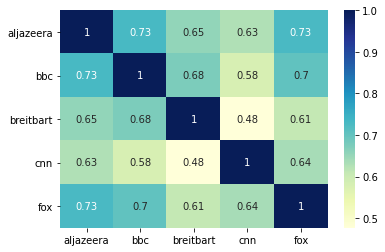

In [158]:
import seaborn as sns
import matplotlib
# create a heatmap for the cosine similarities of articles  
sns.heatmap(df_cosine.astype(float), annot = True,cmap="YlGnBu")

__Discussion__<br>
The news sites report the story of Khashoggi scandal in different manners, in terms of the frequencies of the words used. <br>
Al Jazeera's, BBC's and Fox's reports are similar to each other, with a cosine similarity of 0.7 to 0.73. <br>
Breitbart's story is relatively similar to Al Jazeera's and BBC's stories with a cosine similarity of 0.65 to 0.68, and slighly less similar to Fox's article with a similarity of 0.61. <br>
CNN's story is least close to Breitbart's story with a similarity of 0.48, but (surprisingly) relatively close to Fox's and Al Jazeera's stories, with a similarity of 0.63 to 0.64. CNN and BBC report on the scandal in slightly dissimilar ways, with a cosine similarity of 0.58.

### If we change what words we remove...

In [166]:
# now we only keep the first 300 stopwords 
stopWords = stopWords[:300]
# regenerates a document term matrix for all news reports, we see more words are included in the dataframe
df_words_in_stories2 = gen_DTM(reports)
df_words_in_stories2.index = ['aljazeera', 'bbc', 'breitbart', 'cnn', 'fox']
df_words_in_stories2

,$50bn,1,108,11,12,15,18,2,28,2r,...,world,worse,would,writ,yalova,year,yelova,yet,your,£385bn
aljazeera,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bbc,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,1.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0
breitbart,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
cnn,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
fox,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0


<AxesSubplot:>

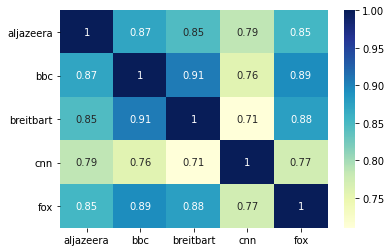

In [168]:
# create another 5x5 dataframe to record cosine similarity 
df_cosine2 = pd.DataFrame(index = np.arange(5), columns = np.arange(5))

# calculate cosines and fill df_cosine with the results
for x in df_cosine2.index:
    for y in df_cosine2.columns:
        df_cosine2.iloc[x,y] = cosine(df_words_in_stories2.iloc[x].values, df_words_in_stories2.iloc[y].values)

df_cosine2.index = ['aljazeera', 'bbc', 'breitbart', 'cnn', 'fox']
df_cosine2.columns = df_cosine2.index.values

# create a heatmap for the cosine similarities of articles  
sns.heatmap(df_cosine2.astype(float), annot = True,cmap="YlGnBu")

__Discussion__<br>
After change the stop words that we remove from 728 to 300, the overall similarities between the news stories increased. This is because we now include more words that are common to all sentences. <br>
But we can observe that the CNN's article is still least similar to Breitbart's article. The reports by Al Jazeera, BBC, Breitbart and Fox are now very similar to one another, with cosine similarities between 0.85 to 0.91. BBC's and Breitbart's stories are the most similar among all reports.